In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [2]:
#reading the csv file into df, seperate columns with ";" character
mat = pd.read_csv("student-mat.csv", sep=";")
por = pd.read_csv("student-por.csv", sep=";")

#obtaining the length of rows and columns from "Student-mat.csv"
mat_rows = len(mat)
mat_cols = len(mat.columns)

#obtaining the length of rows and columns from "Student-por.csv"
por_rows = len(por)
por_cols = len(por.columns)

#printing the results of how many columns and rows each csv file has
print("Student-mat.csv (columns: " + str(mat_rows) + " Rows: " + str(mat_cols)+ ")")
print("Student-por.csv (columns: " + str(por_rows) + " Rows: " + str(por_cols)+ ")")

Student-mat.csv (columns: 395 Rows: 33)
Student-por.csv (columns: 649 Rows: 33)


Displaying how many rows and columns each file contains.

In [3]:
#selecting only categorical columns (object) and storing their names in a list
cat_features = mat.select_dtypes(include=["object"]).columns.tolist

#selecting only numeric columns (int and float) and storing their names in a list
num_features = mat.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorial Features: "+ str(cat_features)+"\n")
print("Numerical Features: "+ str(num_features))

Categorial Features: <bound method IndexOpsMixin.tolist of Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')>

Numerical Features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


Displaying the list of categorical vs numeric features. Within the categorical list we have features that include object types such as demographics, yes/no factors, family information, etc. Within the numerical list we have features that include int and float data types. This includes features such as age, study time, absences, grades, etc.

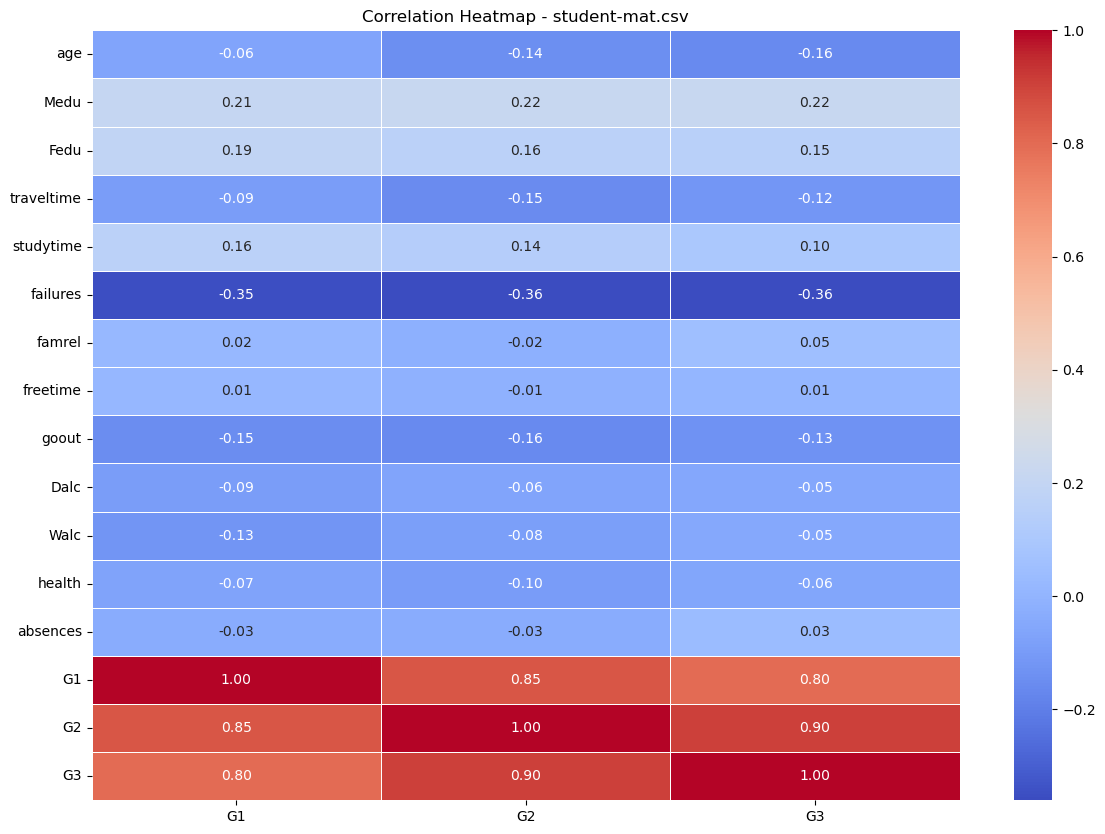

In [4]:
#select numeric columns
student_mat_numeric = mat.select_dtypes(include=["int64", "float64"])

#compute correlations with G1, G2, G3 only
student_mat_corr_grades = student_mat_numeric.corr()[["G1","G2","G3"]]

#plotting the heatmap
plt.figure(figsize=(14,10))
sns.heatmap(student_mat_corr_grades, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap - student-mat.csv")
plt.show()

This heatmap will visualize the values within 'student-mat.cvs'. Using this heatmap I can determine that the top three attributes that have the greatest impact on student grade G1, G2, and G3, is failures, goout, and Medu.

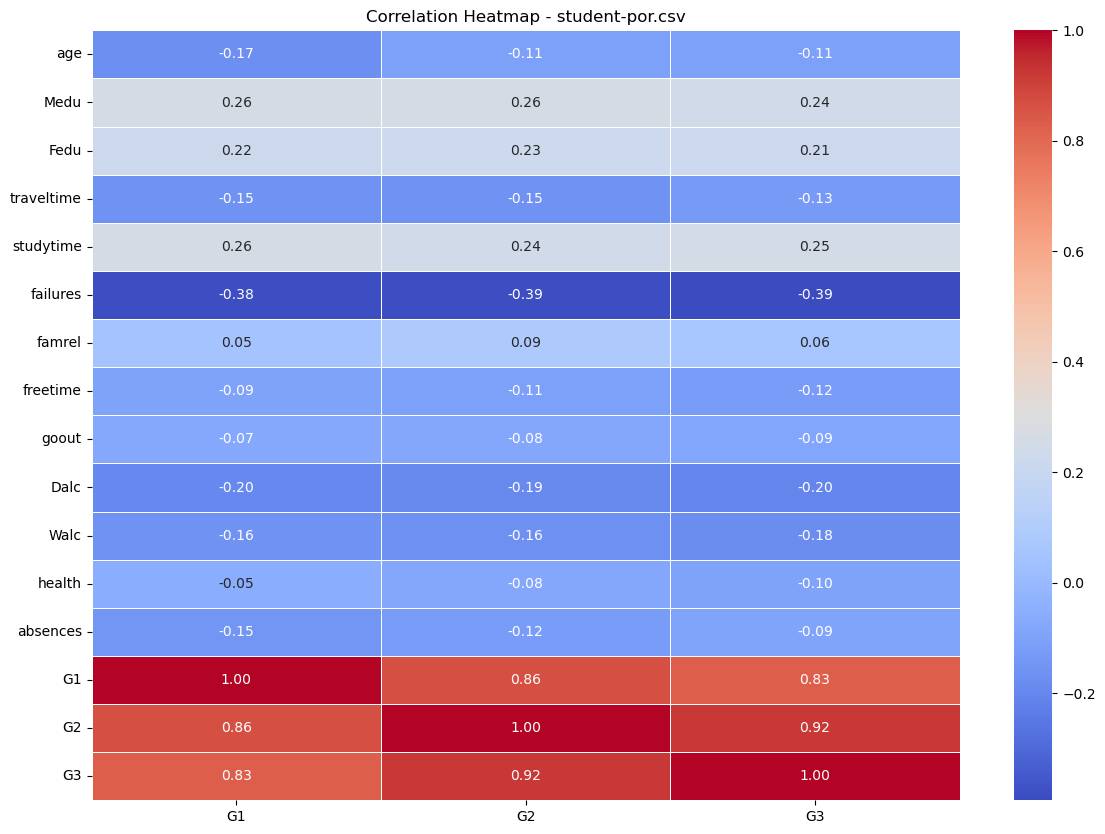

In [5]:
#creating a heatmap for "student-por.csv" file.
#select numeric columns
student_por_numeric = por.select_dtypes(include=["int64", "float64"])

#compute correlations with G1, G2, G3 only
student_por_corr_grades = student_por_numeric.corr()[["G1","G2","G3"]]

#plotting the heatmap
plt.figure(figsize=(14,10))
sns.heatmap(student_por_corr_grades, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap - student-por.csv")
plt.show()

This heatmap will visualize the values within 'student-por.cvs'. Using this heatmap I can determine that the top three attributes that have the greatest impact on student grade G1, G2, and G3, is failures, studytime, and Medu.

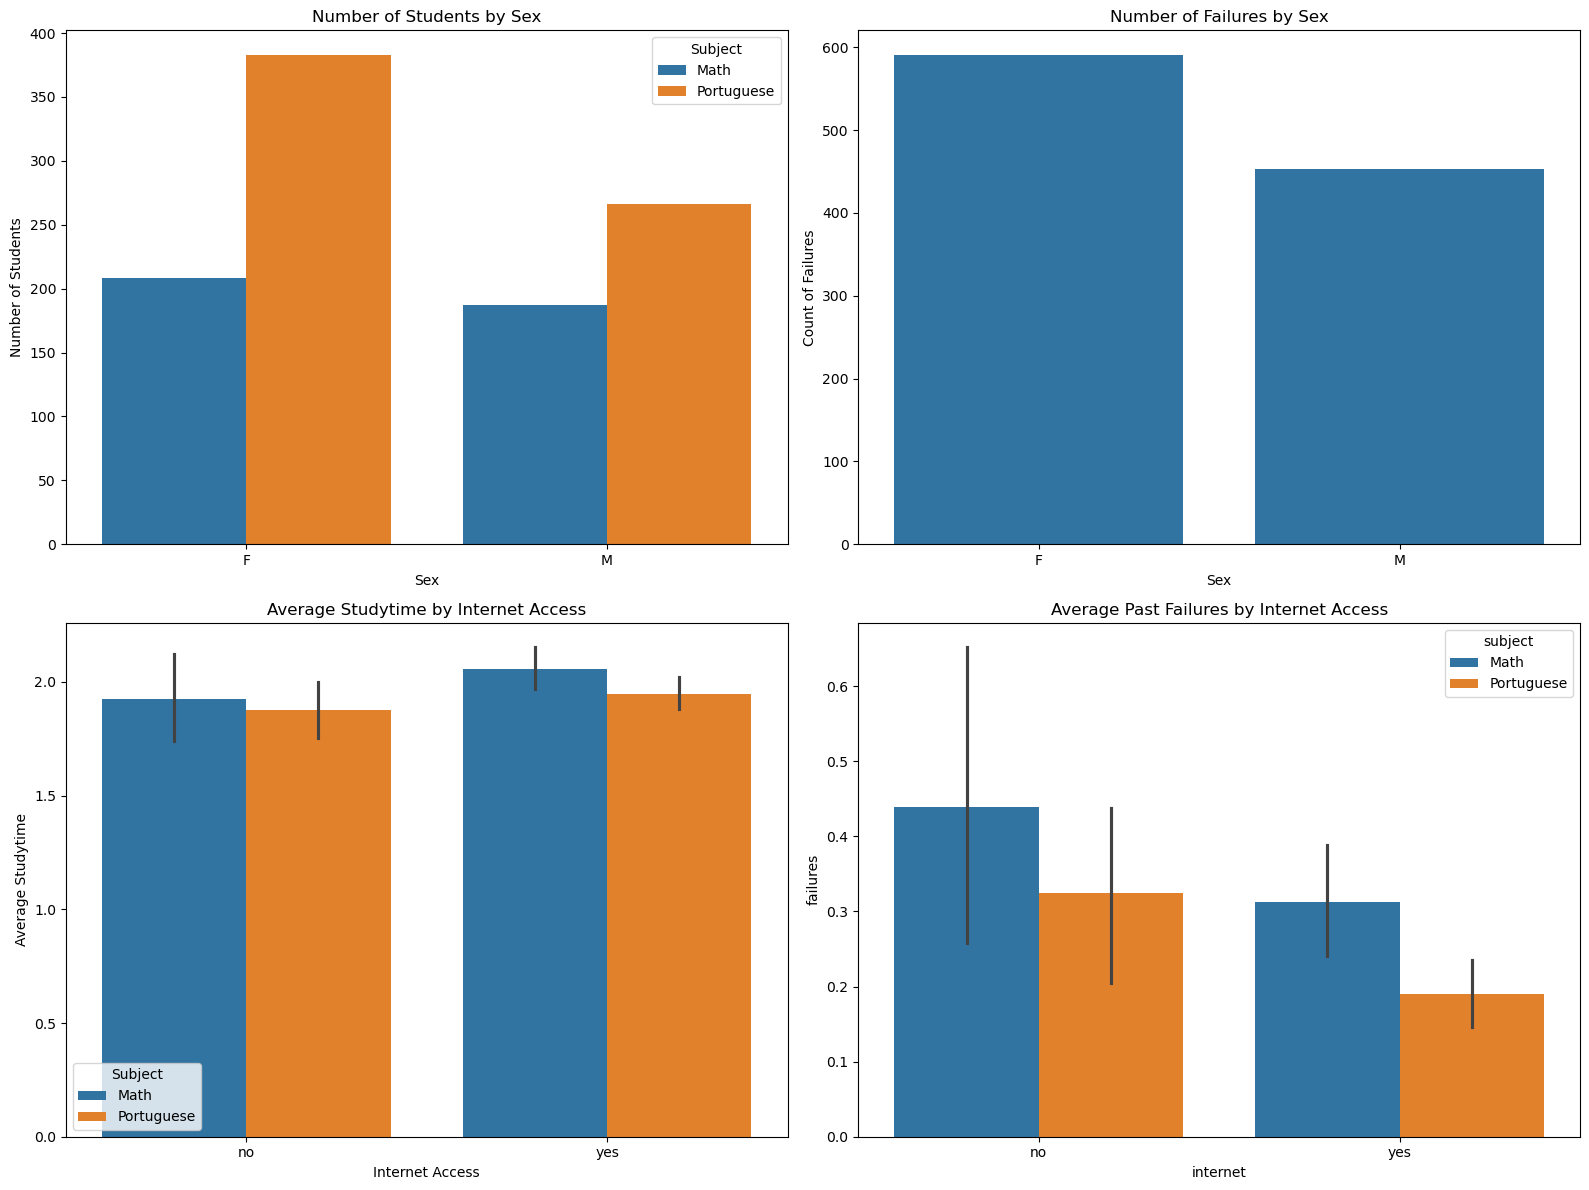

In [6]:
#adding a 'subject' column to each dataset
mat["subject"] = "Math"
por["subject"] = "Portuguese"

#combine the datasets
combined = pd.concat([mat, por], ignore_index=True)

plt.figure(figsize=(16,12))

#barplot for number of students by sex
plt.subplot(2,2,1)
sns.countplot(data=combined, x="sex", hue="subject")
plt.title("Number of Students by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Students")
plt.legend(title="Subject")

#barplot for number of failures by sex
plt.subplot(2,2,2)
sns.countplot(data=combined, x="sex")
plt.title("Number of Failures by Sex")
plt.xlabel("Sex")
plt.ylabel("Count of Failures")

#barplot for average studytime by internet access
plt.subplot(2,2,3)
sns.barplot(data=combined, x="internet", y="studytime", hue="subject")
plt.title("Average Studytime by Internet Access")
plt.xlabel("Internet Access")
plt.ylabel("Average Studytime")
plt.legend(title="Subject")

#barplot for average past failures by internet access
plt.subplot(2,2,4)
sns.barplot(data=combined, x="internet", y="failures", hue="subject")
plt.title("Average Past Failures by Internet Access")

plt.tight_layout()
plt.show()

The figure above shows 4 bar plots that utilize the attributes sex, internet, studytime, and failures and compares these attributes within both csv files. The 'Number of Students by Sex' to the top left is used to visualize the distribution of students by gender. This shows us a quick comparison of male and female student counts which gives us context to analyze other attributes. The 'Number of Failures by Sex' to the top right visualizes how academic failures are distributed between male and female, this allows us to compare failure rates by gender. The 'Average Studytime by Internet Access' in the bottom left visualizes how students studytime can vary depending on whether they have internet access at home. This allows to see if internet access influences study habits and potentially linking with the academic performance. And finally the 'Average Past Failures by Internet Access' to the bottom right visualizes how the number of past failures varies with students access to the internet at home. It allow us to observe whether students with internet access tend to have fewer or more academic difficulties compared to those without.

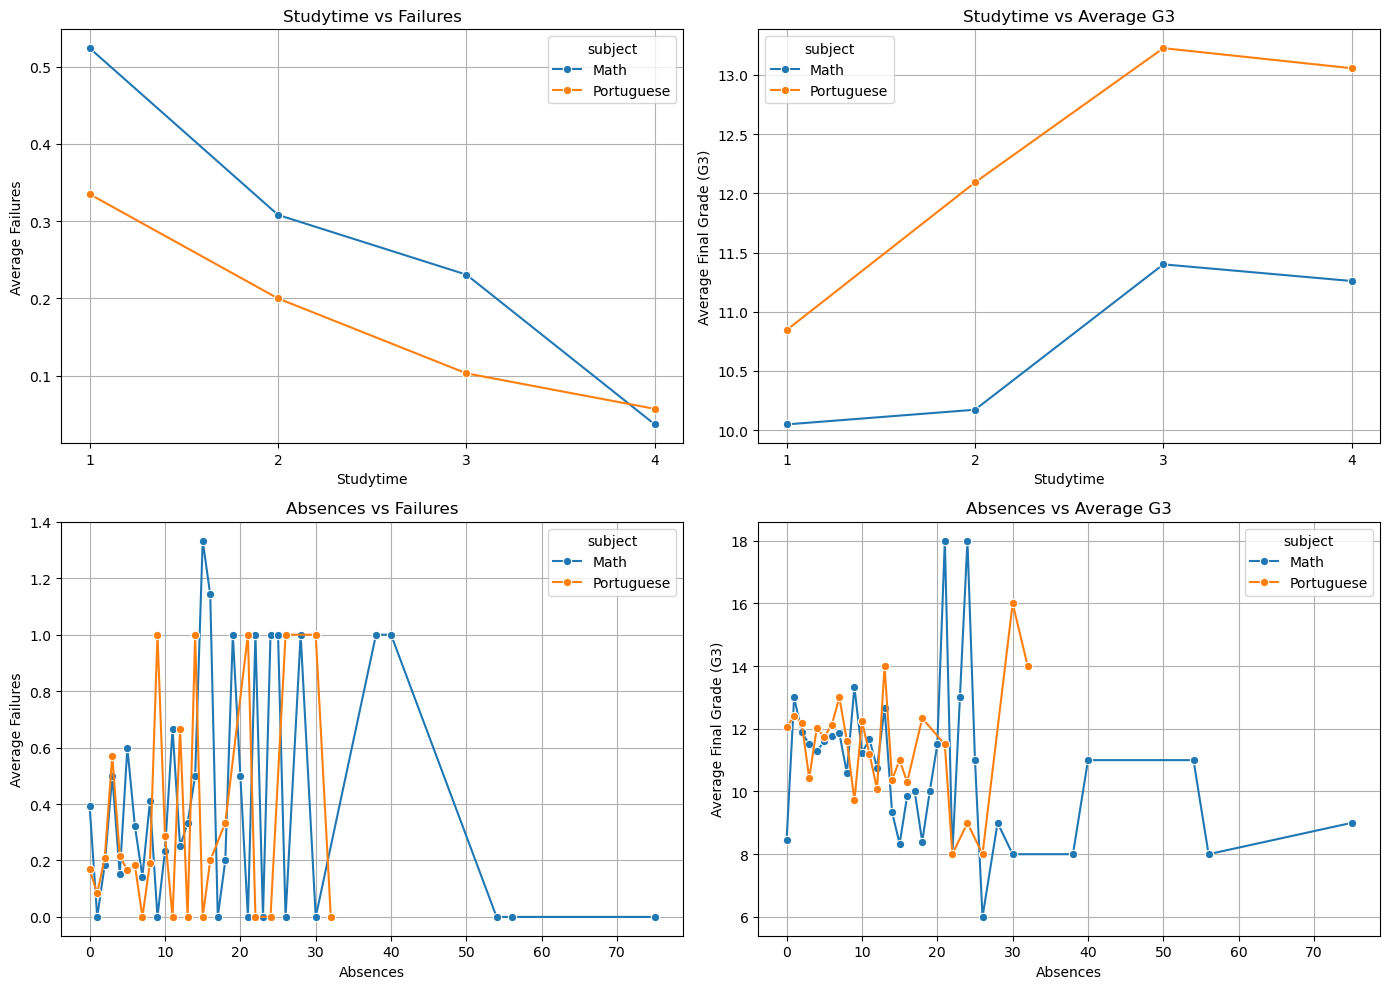

In [7]:
#computing the average values for each plot
#Studytime vs Failures
study_fail = combined.groupby(["subject", "studytime"])["failures"].mean().reset_index()

#Studytime vs G3
study_g3 = combined.groupby(["subject", "studytime"])["G3"].mean().reset_index()

#Absences vs Failures
abs_fail = combined.groupby(["subject", "absences"])["failures"].mean().reset_index()

#Absences vs G3
abs_g3 = combined.groupby(["subject", "absences"])["G3"].mean().reset_index()

#creating 2x2 subplot figure
plt.figure(figsize=(14,10))

#lineplot for Studytime vs Failures
plt.subplot(2,2,1)
sns.lineplot(data=study_fail, x="studytime", y="failures", hue="subject", marker="o")
plt.title("Studytime vs Failures")
plt.xlabel("Studytime")
plt.ylabel("Average Failures")
plt.xticks([1,2,3,4])
plt.grid(True)

#lineplot for Studytime vs G3
plt.subplot(2,2,2)
sns.lineplot(data=study_g3, x="studytime", y="G3", hue="subject", marker="o")
plt.title("Studytime vs Average G3")
plt.xlabel("Studytime")
plt.ylabel("Average Final Grade (G3)")
plt.xticks([1,2,3,4])
plt.grid(True)

#lineplot for Absences vs Failures
plt.subplot(2,2,3)
sns.lineplot(data=abs_fail, x="absences", y="failures", hue="subject", marker="o")
plt.title("Absences vs Failures")
plt.xlabel("Absences")
plt.ylabel("Average Failures")
plt.grid(True)

#lineplot for Absences vs G3
plt.subplot(2,2,4)
sns.lineplot(data=abs_g3, x="absences", y="G3", hue="subject", marker="o")
plt.title("Absences vs Average G3")
plt.xlabel("Absences")
plt.ylabel("Average Final Grade (G3)")
plt.grid(True)

plt.tight_layout()
plt.show()

The figure above shows 4 line plots that utilize the attributes studytime, absences, failures, and final grade (G3) and compares these attributes within both csv files. The 'Studytime vs Failures' plot in the top right visualizes how much time students dedicate to studying, and we can compare study habits between the datasets and find potential links to academic performance. The 'Studytime vs Average G3' to the top right visualizes how students study time relates to their average final grade. This show us wether higher study time tends to correspond with better academic performance. The 'Absences vs Failures' to the bottom left visualizes the relationship between students who are absent and the number of past failures. This allows us to see wether students who miss more classes tend to have more failures. And finally the 'Absences vs Average G3' to the bottom right visualizes the relationship between student absences and their final grade G3. This allows us to see whether higher absences is associated with lower academic performance.

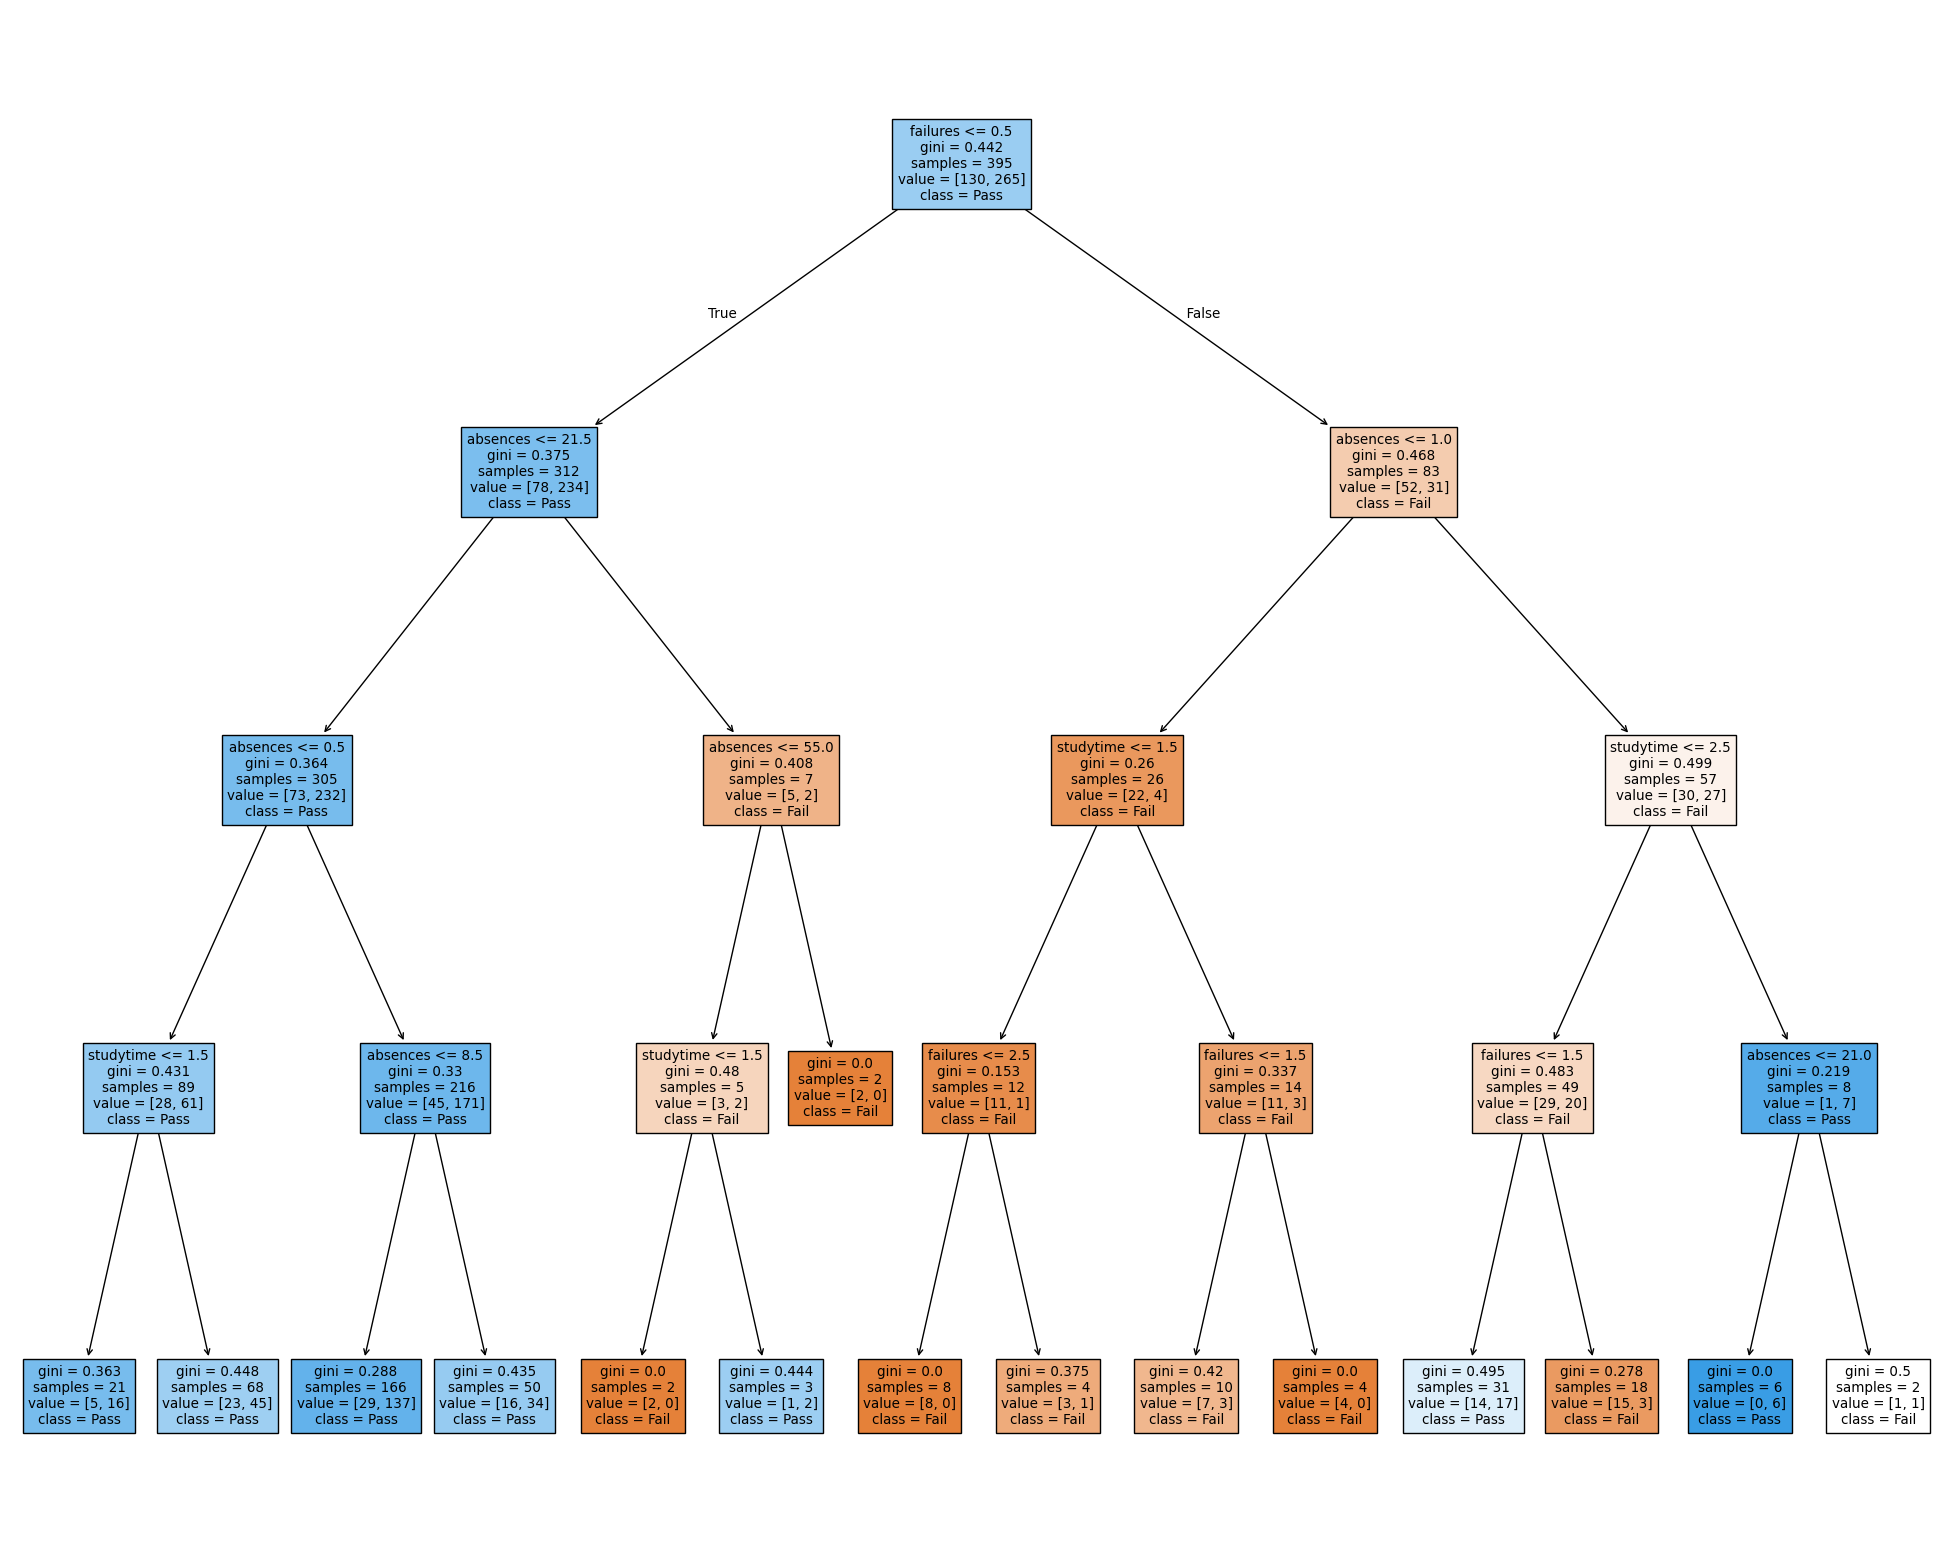

In [8]:
#define features X and target y
#classifying final grade G3 as 'Pass' (>=10) or 'Fail' (<10)
mat['grade_class'] = mat['G3'].apply(lambda x: 'Pass' if x >= 10 else 'Fail')
y = mat['grade_class']

#selecting a subset of features 
X = mat[['studytime', 'failures', 'absences']]

#fitting the decision tree classifier with max_depth=4
clf = DecisionTreeClassifier(max_depth=4, random_state=1234)
model = clf.fit(X, y)

#visualize the tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()

This decision tree is built to classify students final grades as 'Pass' or 'Fail' based on selected features such as studytime, absences, and past failures. Each node shows a desicion rule, splitting students according to the feature values to predict their grade category. The trees branches visualize how combinations of these attributes lead to different outcomes.

In [9]:
#create binary target: 1 if G3 >= 12, otherwise its 0
por['passed'] = por['G3'].apply(lambda x: 1 if x >= 12 else 0)

#class distribution
total_students = len(por)
passed_count = len(por[por['passed'] == 1])
failed_count = len(por[por['passed'] == 0])

#P(Passed) - probability of passing
P_passed = passed_count / total_students

#P(G1 >= 12) - probability that G1 is 12 or higher
P_G1_high = len(por[por['G1'] >= 12]) / total_students

#P(G1 >= 12 | Passed) - probability that a student G1 is 12 or higher and passed the course
P_G1_high_passed = len(por[(por['G1'] >= 12) & (por['passed'] == 1)]) / passed_count

#Applying Bayes theorem
P_passed_G1_high = (P_G1_high_passed * P_passed) / P_G1_high

print(f"Percentage Passed: {passed_count / total_students * 100:.2f}%")
print(f"Percentage Failed: {failed_count / total_students * 100:.2f}%")
print(f"Probability of passing given G1 >= 12: {P_passed_G1_high:.2f}")

Percentage Passed: 53.62%
Percentage Failed: 46.38%
Probability of passing given G1 >= 12: 0.92


Based on the bayes theorm of student-por.csv dataset, approximately 53.62% passed the course while 46.38% failed. Students with a first period grade G1 of 12 or higher were significantly more likely to pass, as shown in the conditional probability. This tells us that early perfomance in the course is a strong prediction of the final outcome.